In [104]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

# Data understanding

### Data collection

In [105]:
file = 'access-drinking-water-stacked.csv'
access_drinking = spark.read.csv(file,header=True, inferSchema=True)
file2 = 'death-rates-unsafe-water.csv'
death_rates_unsafe_water = spark.read.csv(file2,header=True, inferSchema=True)
file3 = 'share-deaths-unsafe-water.csv'
death_share_unsafe_water = spark.read.csv(file3,header=True, inferSchema=True)
file4 =  'deaths-from-diarrheal-diseases-who.csv'
death_from_diarrheal_disease = spark.read.csv(file4,header=True, inferSchema=True)
file5 = 'historical-gov-spending-gdp.csv'
gov_spending = spark.read.csv(file5,header=True, inferSchema=True)
file6 = 'improved-water-sources-vs-gdp-per-capita.csv'
improved_water_sources_vs_gdp = spark.read.csv(file6,header=True, inferSchema=True)
file7 = 'number-without-improved-water.csv'
number_without_improved_water = spark.read.csv(file7,header=True, inferSchema=True)
file8 = 'number-without-safe-drinking-water.csv'
number_without_safe_drinking_water = spark.read.csv(file8,header=True, inferSchema=True)
file9= 'people-practicing-open-defecation-of-population.csv'
open_defecation = spark.read.csv(file9,header=True, inferSchema=True)
file10 = 'physicians-per-1000-people.csv'
physicians_number = spark.read.csv(file10,header=True, inferSchema=True)
file11 = 'public-healthcare-spending-share-gdp.csv'
healthcare_spending = spark.read.csv(file11,header=True, inferSchema=True)
file12 = 'public-health-expenditure-share-GDP-OWID.csv'
health_expenditure_share_GDP = spark.read.csv(file12,header=True, inferSchema=True)
file13 = 'healthcare-expenditure-vs-gdp.csv'
healthcare_expenditure_vs_GDP = spark.read.csv(file13,header=True, inferSchema=True)
file14 = 'water-bodies-good-water-quality.csv'
water_bodies_quality = spark.read.csv(file14,header=True, inferSchema=True)
file15 = 'urban-improved-water-access-vs-rural-water-access.csv'
urban_rural_imp_water_access = spark.read.csv(file15,header=True, inferSchema=True)

In [106]:
print(number_without_improved_water.count())

5069


In [107]:
print(number_without_safe_drinking_water.count())

3162


In [108]:
print(open_defecation.count())

4978


In [109]:
print(physicians_number.count())

4682


In [110]:
print(water_bodies_quality.count())

162


### Data visualization

In [111]:
death_share_unsafe_water.show()

+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+
|     Entity|Code|Year|Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized|
+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+
|Afghanistan| AFG|1990|                                                                                                            1.0503434|
|Afghanistan| AFG|1991|                                                                                                            1.0454241|
|Afghanistan| AFG|1992|                                                                                                            1.0731887|
|Afghanistan| AFG|1993|                                                                                                            1.2799127|
|Afgha

In [112]:
from pyspark.sql import functions

# Delete the regions
death_share_unsafe_water = death_share_unsafe_water.dropna(subset=['Code'])

# Get the latest year
latest_year = death_share_unsafe_water.agg(functions.max('Year')).collect()[0][0]
latest_data = death_share_unsafe_water.filter(death_share_unsafe_water['Year'] == latest_year)

top_5_countries = latest_data.orderBy(functions.col('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized').desc()).limit(5).select('Entity').rdd.flatMap(lambda x: x).collect()
bottom_5_countries = latest_data.orderBy('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized').limit(5).select('Entity').rdd.flatMap(lambda x: x).collect()

# Calculate the median death share
median_death_share = latest_data.approxQuantile('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized', [0.5], 0.0)[0]
# Calculate countries' distance from the median
latest_data = latest_data.withColumn('distance_to_median', functions.abs(latest_data['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'] - median_death_share))
# Countries closest to the median
median_5_countries = latest_data.orderBy('distance_to_median').limit(5).select('Entity').rdd.flatMap(lambda x: x).collect()

selected_countries = top_5_countries + bottom_5_countries + median_5_countries


In [113]:
print('top5', top_5_countries)
print('botton5',bottom_5_countries)
print('median5',median_5_countries)
print('selected15',selected_countries)

top5 ['Chad', 'Central African Republic', 'Niger', 'South Sudan', 'Nigeria']
botton5 ['Greece', 'Monaco', 'San Marino', 'Finland', 'Malta']
median5 ['Paraguay', 'Guam', 'Tonga', 'Saint Vincent and the Grenadines', 'Mexico']
selected15 ['Chad', 'Central African Republic', 'Niger', 'South Sudan', 'Nigeria', 'Greece', 'Monaco', 'San Marino', 'Finland', 'Malta', 'Paraguay', 'Guam', 'Tonga', 'Saint Vincent and the Grenadines', 'Mexico']


### transform pyspark dataframe to pandas dataframe for data visualization by matplotlib

In [114]:
access_drinking_pandas = access_drinking.toPandas()
death_rates_unsafe_water_pandas = death_rates_unsafe_water.toPandas()
death_share_unsafe_water_pandas = death_share_unsafe_water.toPandas()
death_from_diarrheal_disease_pandas = death_from_diarrheal_disease.toPandas()
gov_spending_pandas = gov_spending.toPandas()
improved_water_sources_vs_gdp_pandas = improved_water_sources_vs_gdp.toPandas()
number_without_improved_water_pandas = number_without_improved_water.toPandas()
number_without_safe_drinking_water_pandas = number_without_safe_drinking_water.toPandas()
open_defecation_pandas = open_defecation.toPandas()
physicians_number_pandas = physicians_number.toPandas()
healthcare_spending_pandas = healthcare_spending.toPandas()
health_expenditure_share_GDP_pandas = health_expenditure_share_GDP.toPandas()
healthcare_expenditure_vs_GDP_pandas = healthcare_expenditure_vs_GDP.toPandas()
water_bodies_quality_pandas = water_bodies_quality.toPandas()
urban_rural_imp_water_access_pandas = urban_rural_imp_water_access.toPandas()

In [115]:
import matplotlib.pyplot as plt

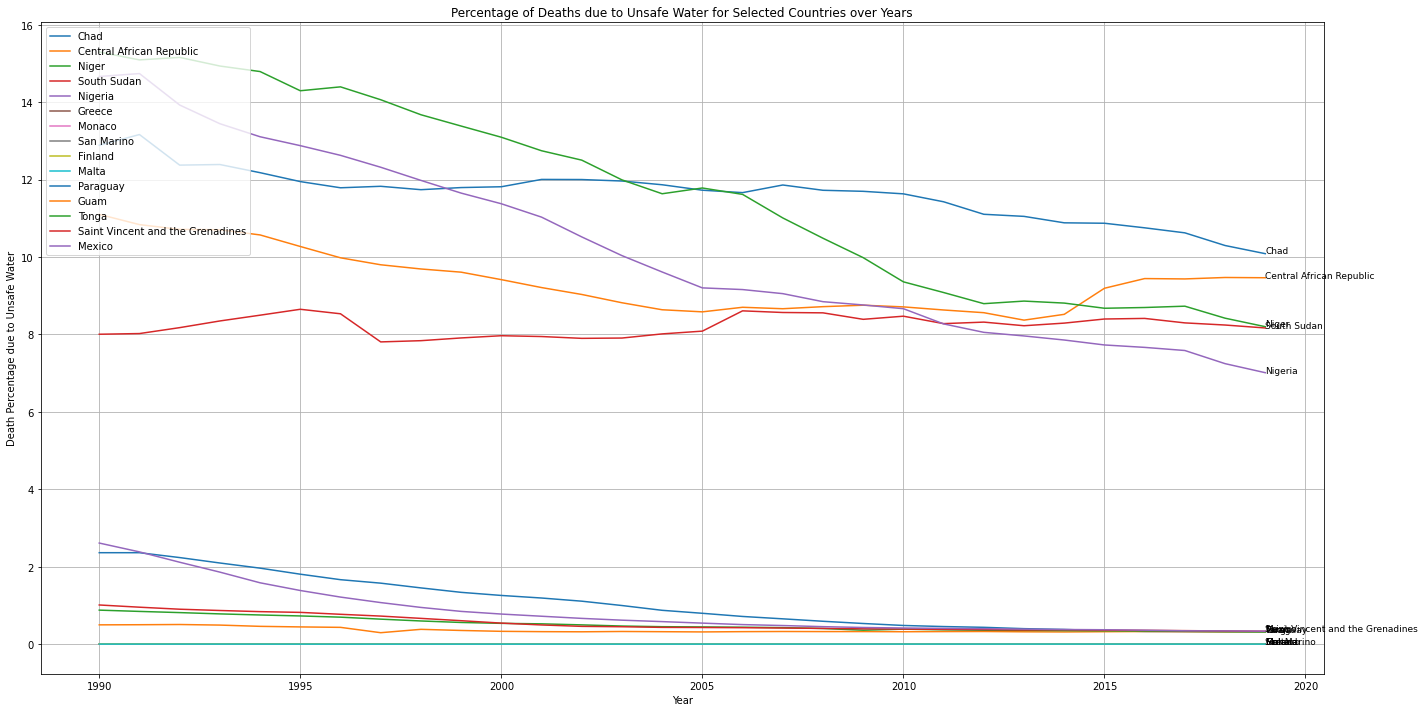

In [116]:
#death share visualization
selected_data = death_share_unsafe_water_pandas[death_share_unsafe_water_pandas['Entity'].isin(selected_countries)]

plt.figure(figsize=(20, 10))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'], country, fontsize=9)
    
plt.title('Percentage of Deaths due to Unsafe Water for Selected Countries over Years')
plt.xlabel('Year')
plt.ylabel('Death Percentage due to Unsafe Water')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

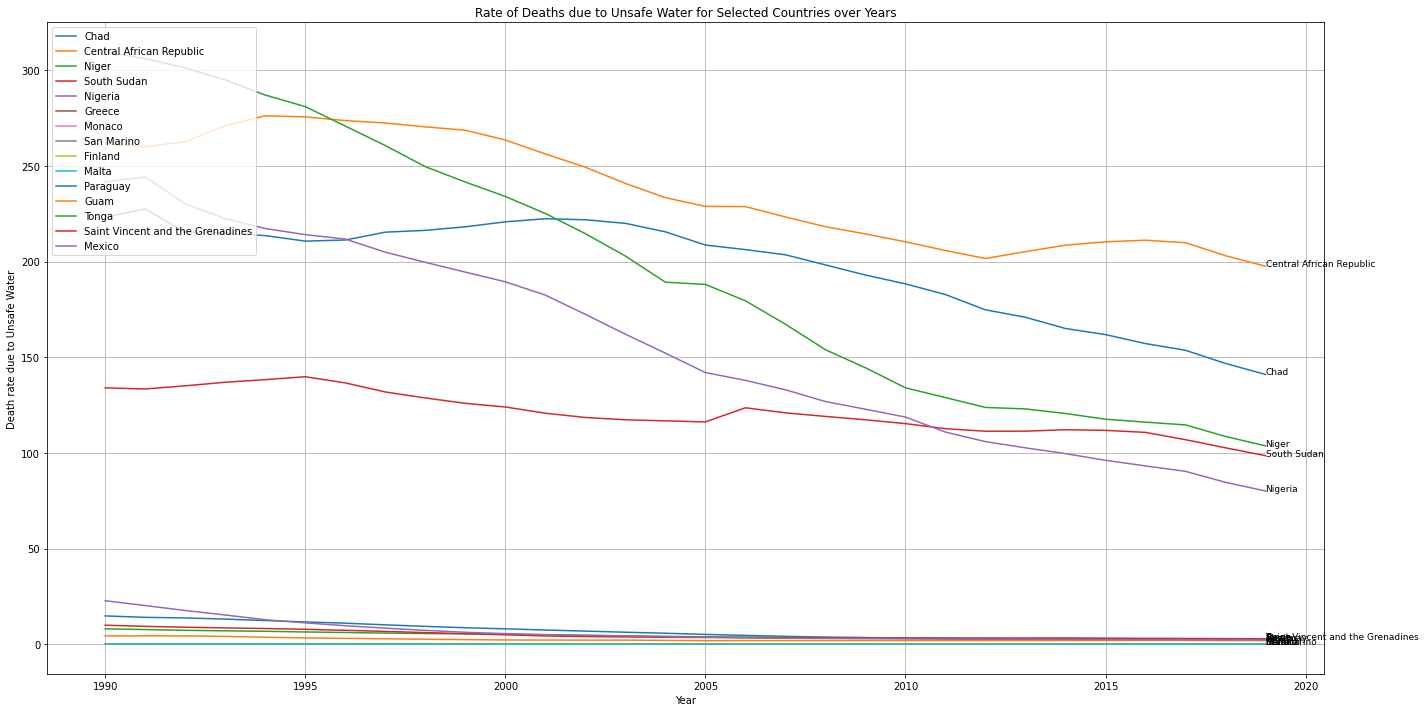

In [117]:
#death rate
selected_data = death_rates_unsafe_water_pandas[death_rates_unsafe_water_pandas['Entity'].isin(selected_countries)]

plt.figure(figsize=(20, 10))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized'], country, fontsize=9)

plt.title('Rate of Deaths due to Unsafe Water for Selected Countries over Years')
plt.xlabel('Year')
plt.ylabel('Death rate due to Unsafe Water')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


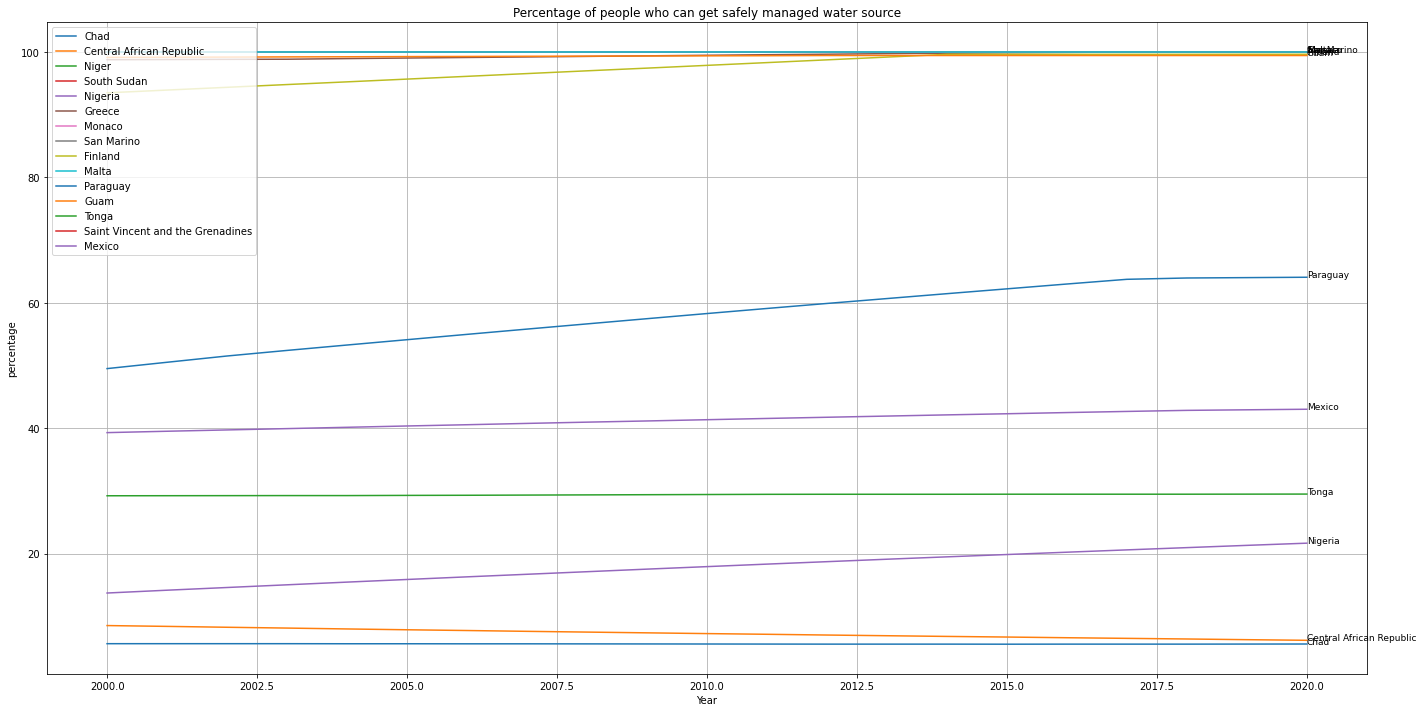

In [118]:
#countries' percentage of reaching safely managed water 
selected_data = access_drinking_pandas[access_drinking_pandas['Entity'].isin(selected_countries)]

plt.figure(figsize=(20, 10))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['wat_sm'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['wat_sm'], country, fontsize=9)
    
plt.title('Percentage of people who can get safely managed water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

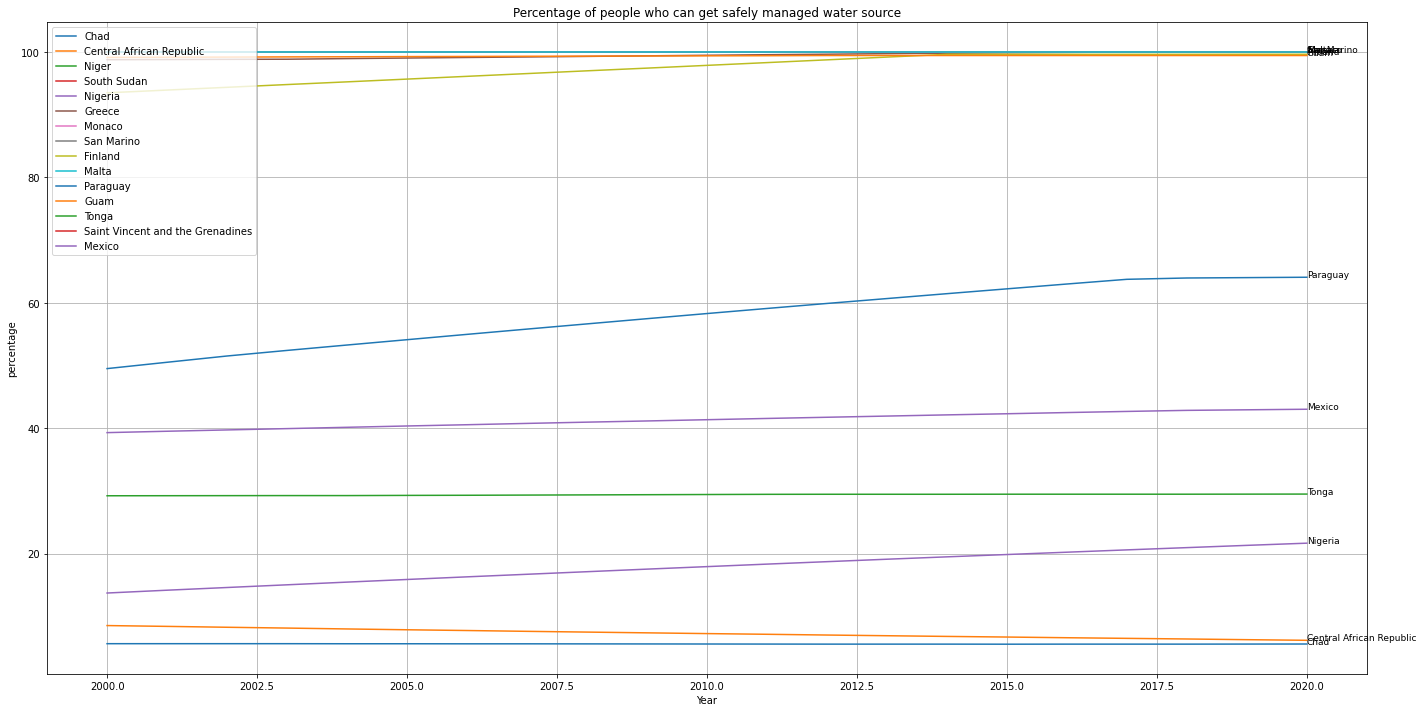

In [119]:
#countries' percentage of reaching safely managed water 
selected_data = access_drinking_pandas[access_drinking_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))

for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # Filter rows with NaN values in the columns
    country_data = country_data.dropna(subset=['Year', 'wat_sm'])
    
    plt.plot(country_data['Year'], country_data['wat_sm'], label=country)
    
    if not country_data.empty: 
        last_point = country_data.iloc[-1]
        plt.text(last_point['Year'], last_point['wat_sm'], country, fontsize=9)
    
plt.title('Percentage of people who can get safely managed water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


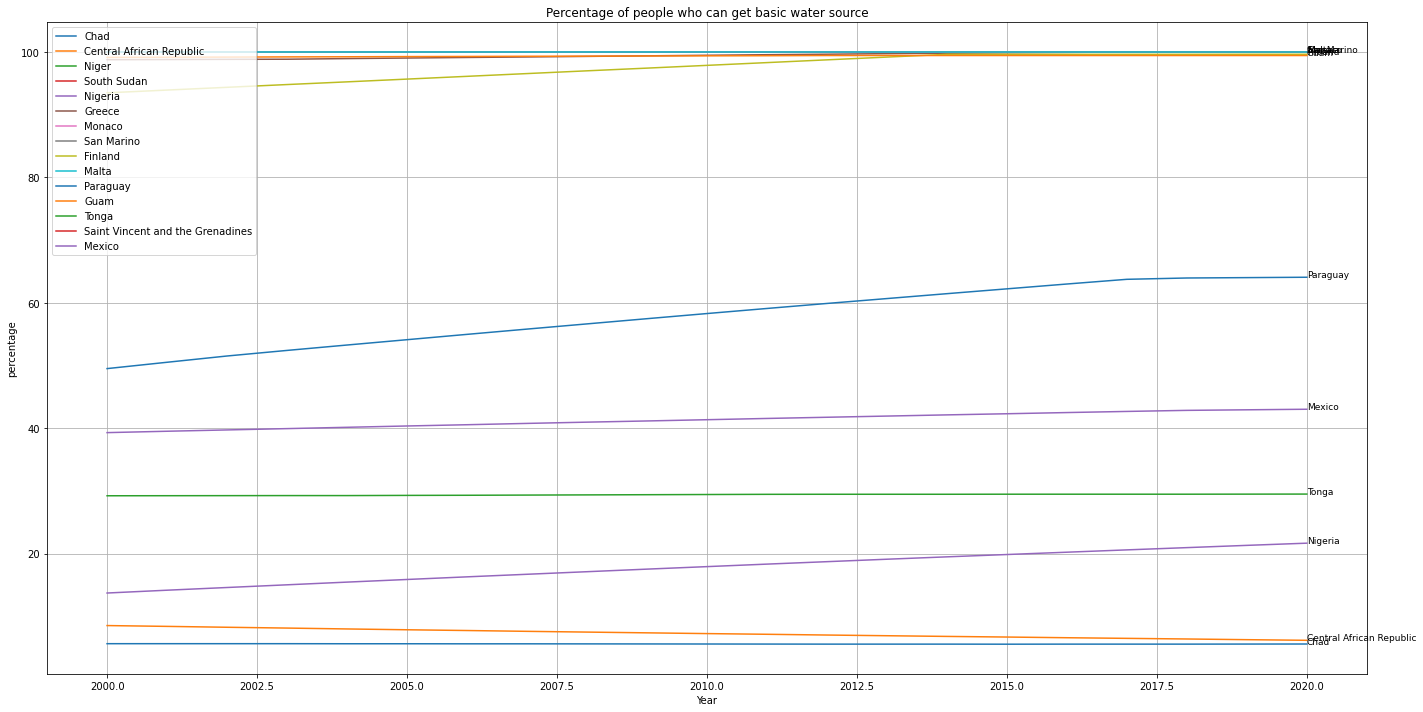

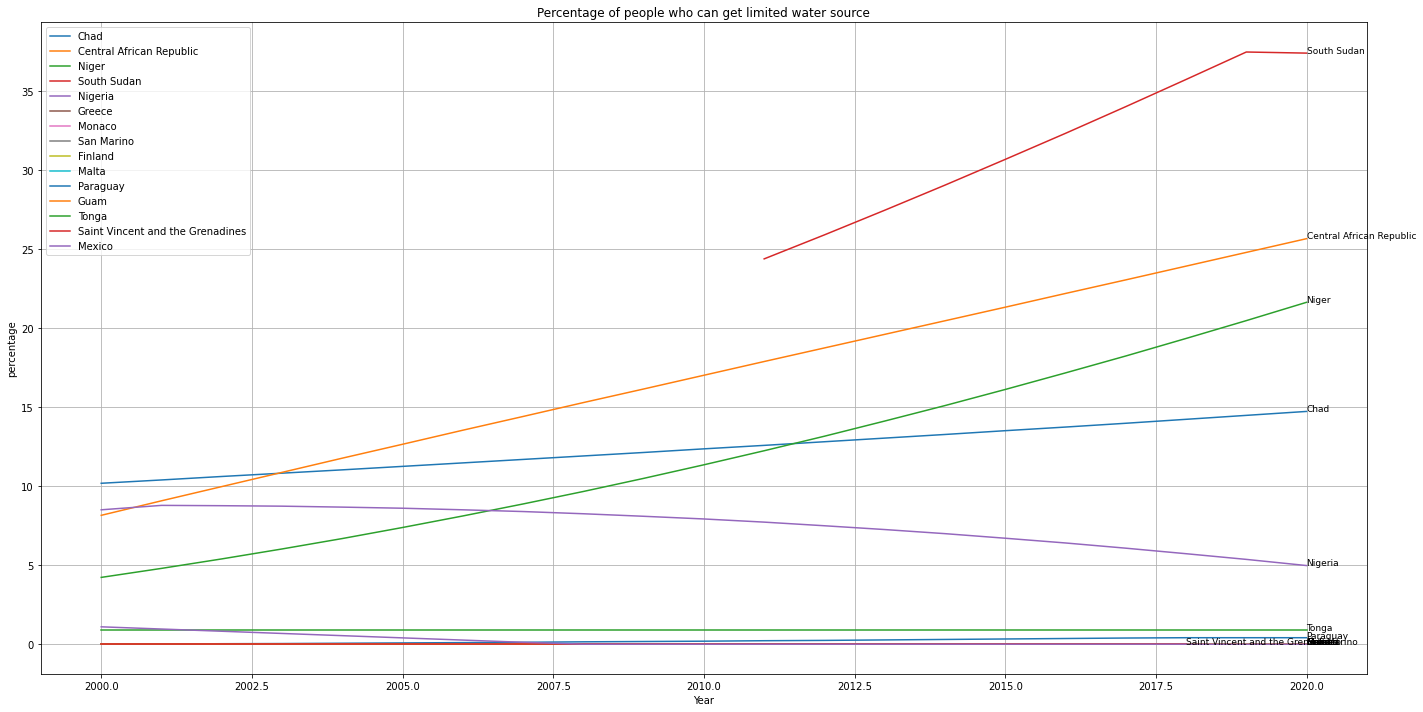

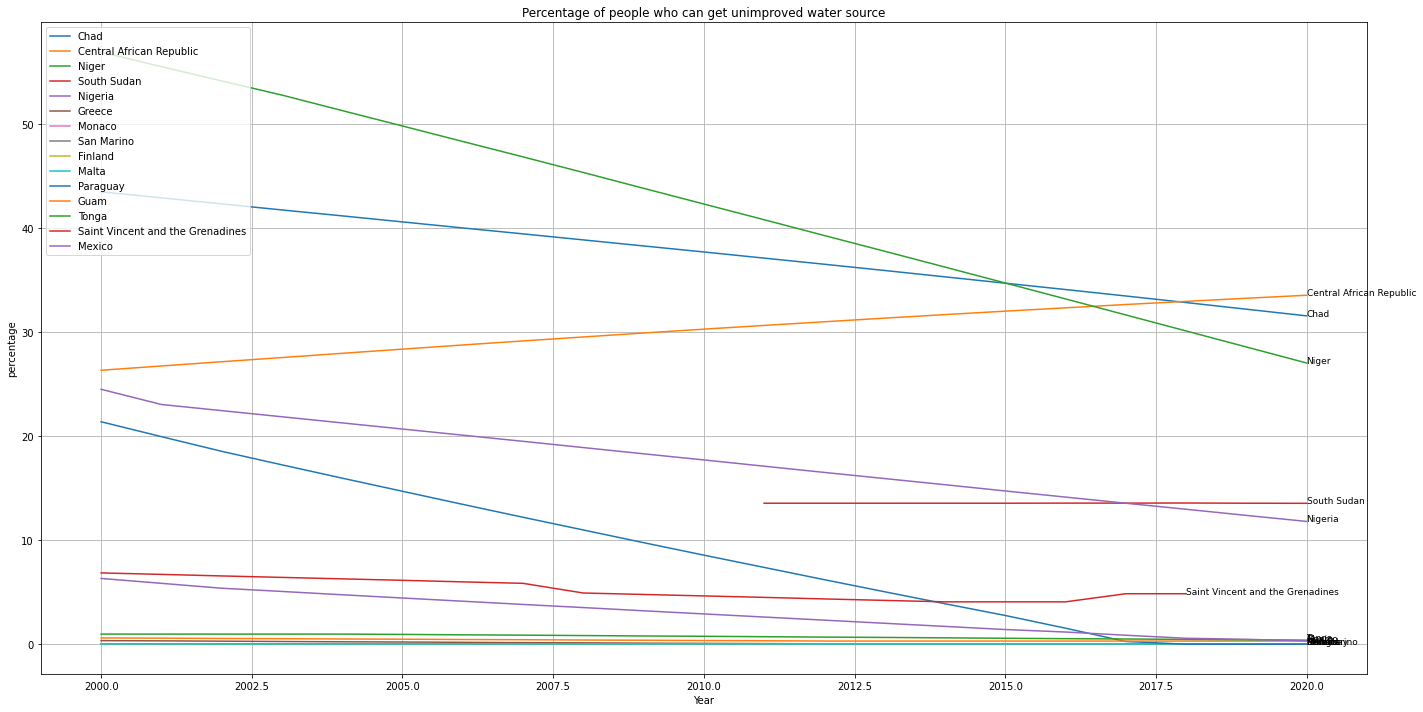

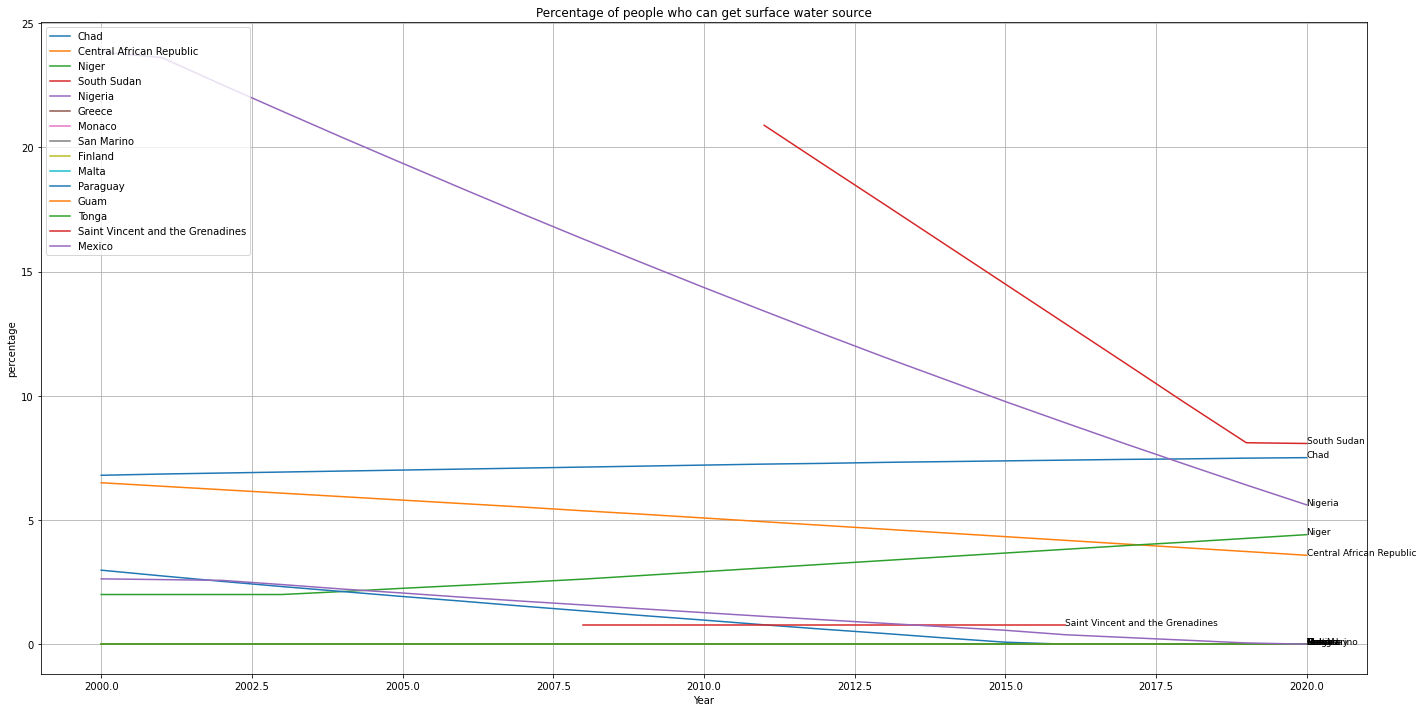

In [120]:
#countries' percentage of reaching basic water 
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # Filter rows with NaN values in the columns
    country_data = country_data.dropna(subset=['Year', 'wat_sm'])
    
    plt.plot(country_data['Year'], country_data['wat_sm'], label=country)
    
    if not country_data.empty: 
        last_point = country_data.iloc[-1]
        plt.text(last_point['Year'], last_point['wat_sm'], country, fontsize=9)
    
plt.title('Percentage of people who can get basic water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
#countries' percentage of reaching limited water 
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # Filter rows with NaN values in the columns
    country_data = country_data.dropna(subset=['Year', 'wat_lim'])
    
    plt.plot(country_data['Year'], country_data['wat_lim'], label=country)
    
    if not country_data.empty: 
        last_point = country_data.iloc[-1]
        plt.text(last_point['Year'], last_point['wat_lim'], country, fontsize=9)
    
plt.title('Percentage of people who can get limited water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
#countries' percentage of reaching unimproved water 
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # Filter rows with NaN values in the columns
    country_data = country_data.dropna(subset=['Year', 'wat_unimp'])
    
    plt.plot(country_data['Year'], country_data['wat_unimp'], label=country)
    
    if not country_data.empty: 
        last_point = country_data.iloc[-1]
        plt.text(last_point['Year'], last_point['wat_unimp'], country, fontsize=9)
    
plt.title('Percentage of people who can get unimproved water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
#countries' percentage of reaching surface water 
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # Filter rows with NaN values in the columns
    country_data = country_data.dropna(subset=['Year', 'wat_sur'])
    
    plt.plot(country_data['Year'], country_data['wat_sur'], label=country)
    
    if not country_data.empty: 
        last_point = country_data.iloc[-1]
        plt.text(last_point['Year'], last_point['wat_sur'], country, fontsize=9)
    
plt.title('Percentage of people who can get surface water source')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for Monaco. Skipping...
No data available for San Marino. Skipping...
No data available for Guam. Skipping...


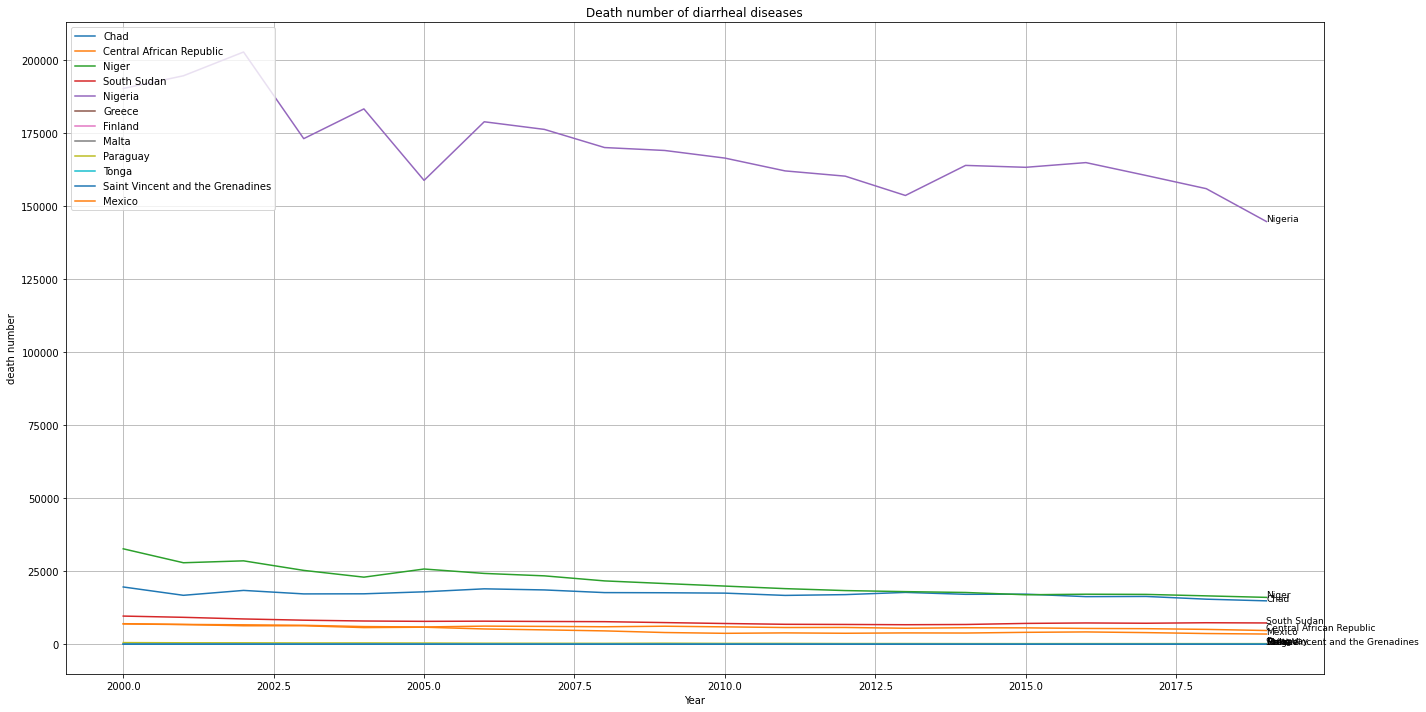

In [121]:
#countries' death number of diarrheal diseases 
selected_data = death_from_diarrheal_disease_pandas[death_from_diarrheal_disease_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['death_count - Cause: Diarrhoeal diseases - Sex: Both sexes - Age_group: ALLAges'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['death_count - Cause: Diarrhoeal diseases - Sex: Both sexes - Age_group: ALLAges'], country, fontsize=9)
    
plt.title('Death number of diarrheal diseases')
plt.xlabel('Year')
plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for South Sudan. Skipping...
No data available for Monaco. Skipping...
No data available for San Marino. Skipping...
No data available for Malta. Skipping...
No data available for Guam. Skipping...


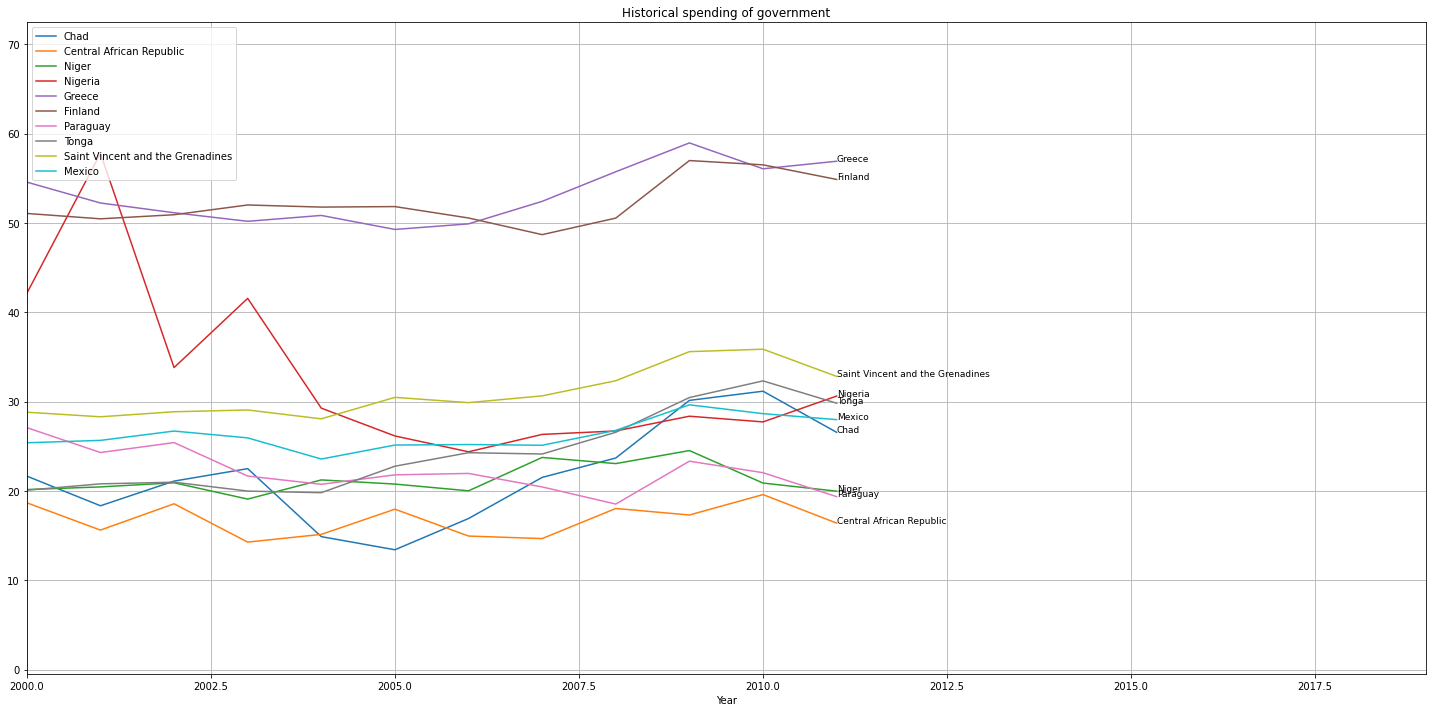

In [122]:
#historical spending of government
selected_data = gov_spending_pandas[gov_spending_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['Government Expenditure (IMF based on Mauro et al. (2015))'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Government Expenditure (IMF based on Mauro et al. (2015))'], country, fontsize=9)
    
plt.title('Historical spending of government')
plt.xlabel('Year')
plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for South Sudan. Skipping...
No data available for Monaco. Skipping...
No data available for Guam. Skipping...


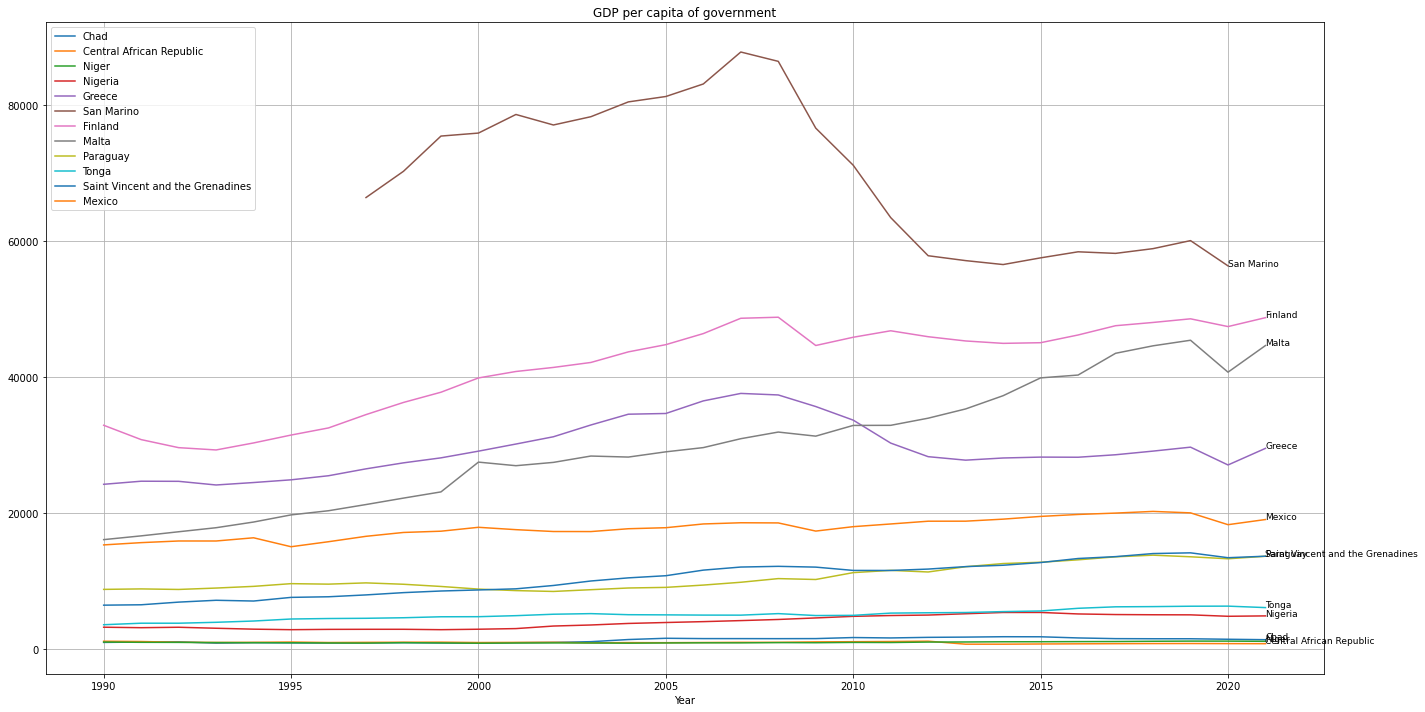

In [123]:
#gdp per capita
selected_data = improved_water_sources_vs_gdp_pandas[improved_water_sources_vs_gdp_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'GDP per capita, PPP (constant 2017 international $)'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['GDP per capita, PPP (constant 2017 international $)'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['GDP per capita, PPP (constant 2017 international $)'], country, fontsize=9)
    
plt.title('GDP per capita of government')
plt.xlabel('Year')
#plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

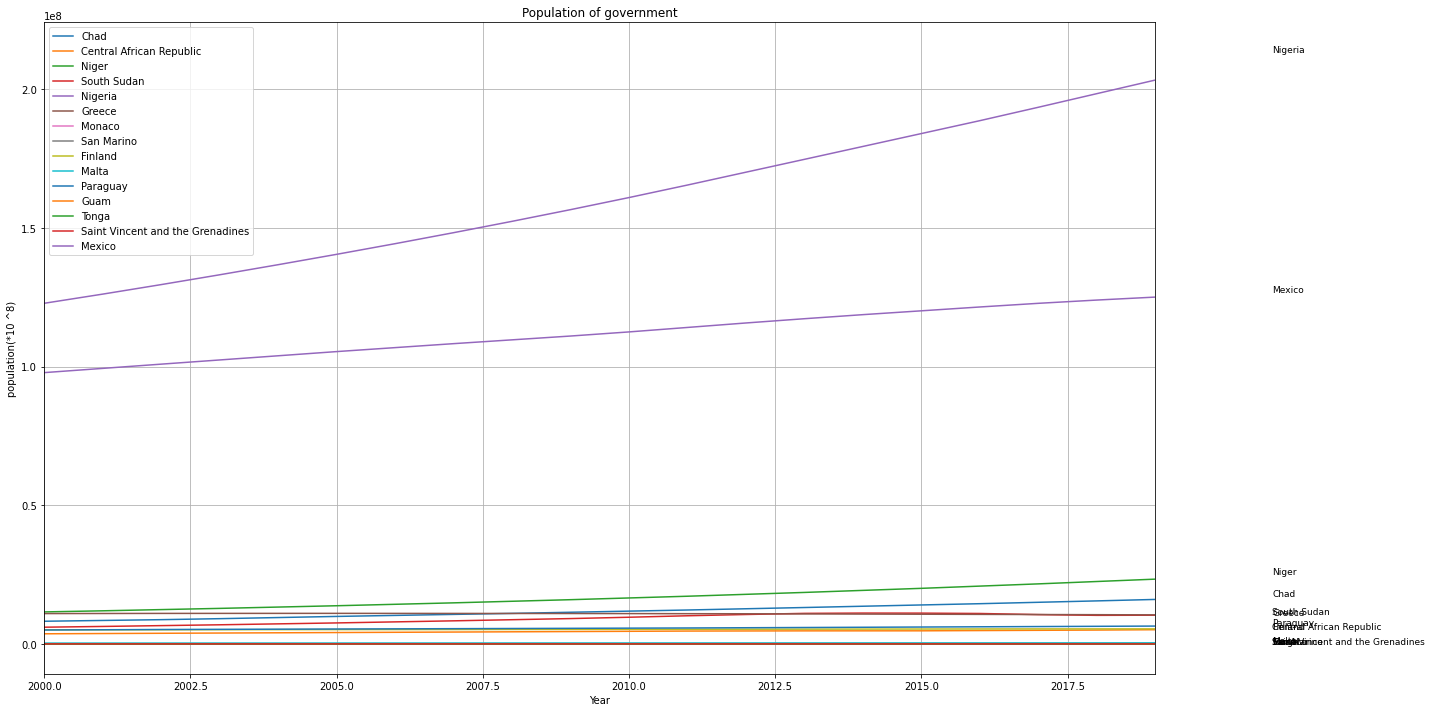

In [124]:
#population
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'Population (historical estimates)'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['Population (historical estimates)'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Population (historical estimates)'], country, fontsize=9)
    
plt.title('Population of government')
plt.xlabel('Year')
plt.xlim(2000, 2019)
plt.ylabel('population(*10 ^8)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

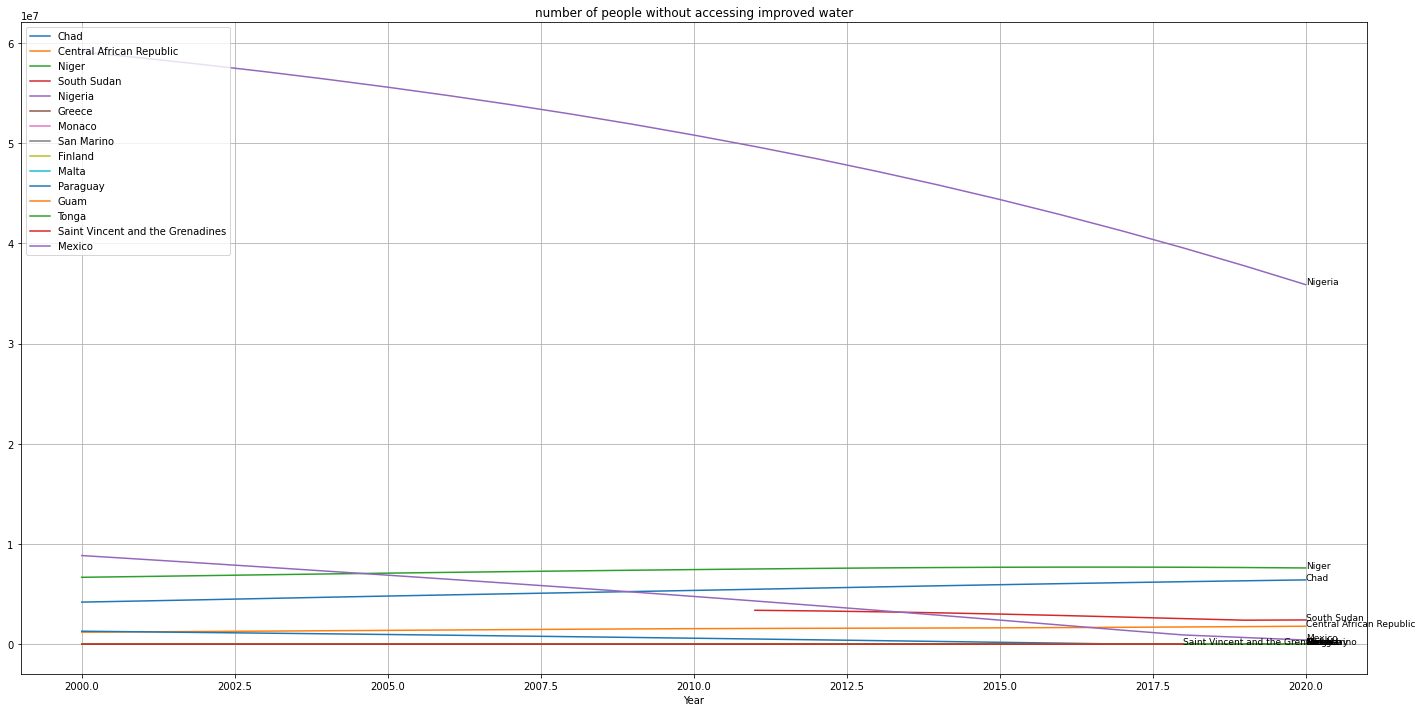

In [125]:
#number of people without accessing improved water
selected_data = number_without_improved_water_pandas[number_without_improved_water_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'wat_imp_number_without'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['wat_imp_number_without'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['wat_imp_number_without'], country, fontsize=9)
    
plt.title('number of people without accessing improved water')
plt.xlabel('Year')
#plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for Niger. Skipping...
No data available for South Sudan. Skipping...
No data available for Saint Vincent and the Grenadines. Skipping...


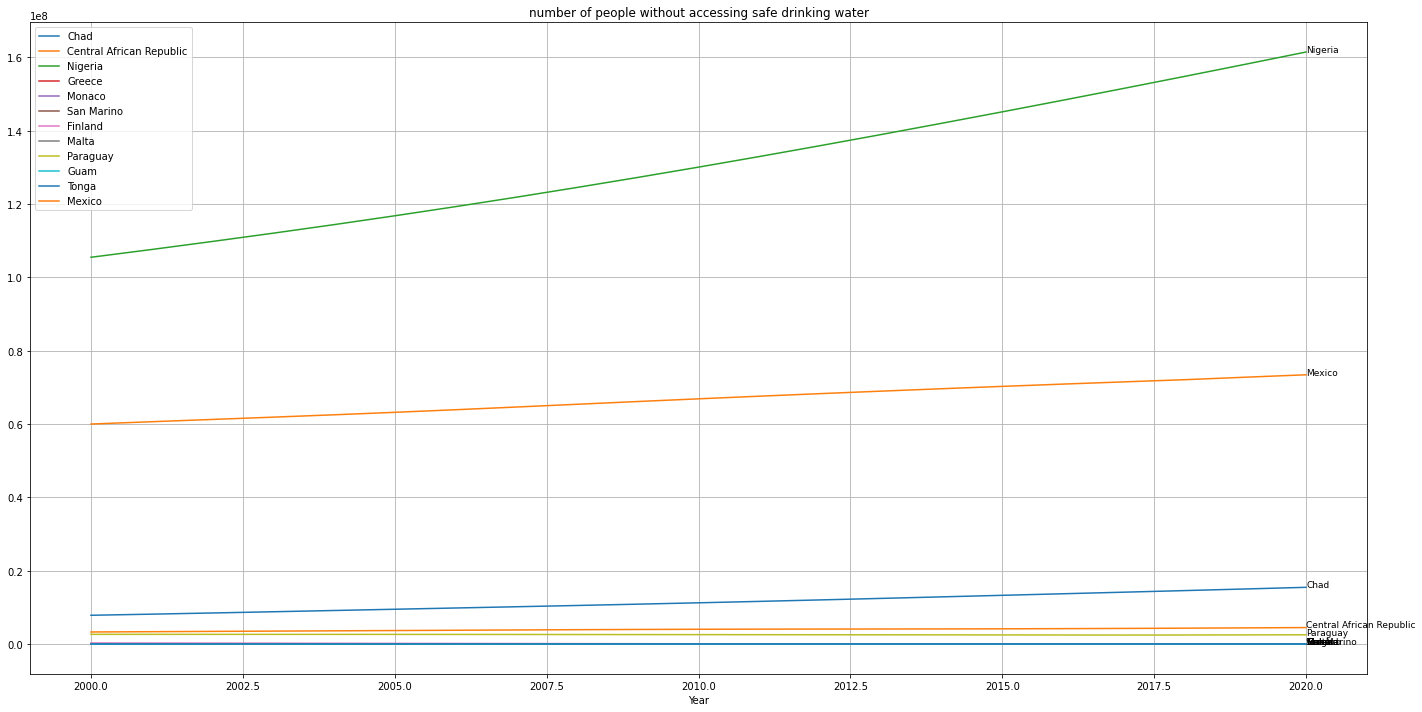

In [126]:
#number of people without accessing safely drinking water
selected_data = number_without_safe_drinking_water_pandas[number_without_safe_drinking_water_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'wat_sm_number_without'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['wat_sm_number_without'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['wat_sm_number_without'], country, fontsize=9)
    
plt.title('number of people without accessing safe drinking water')
plt.xlabel('Year')
#plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

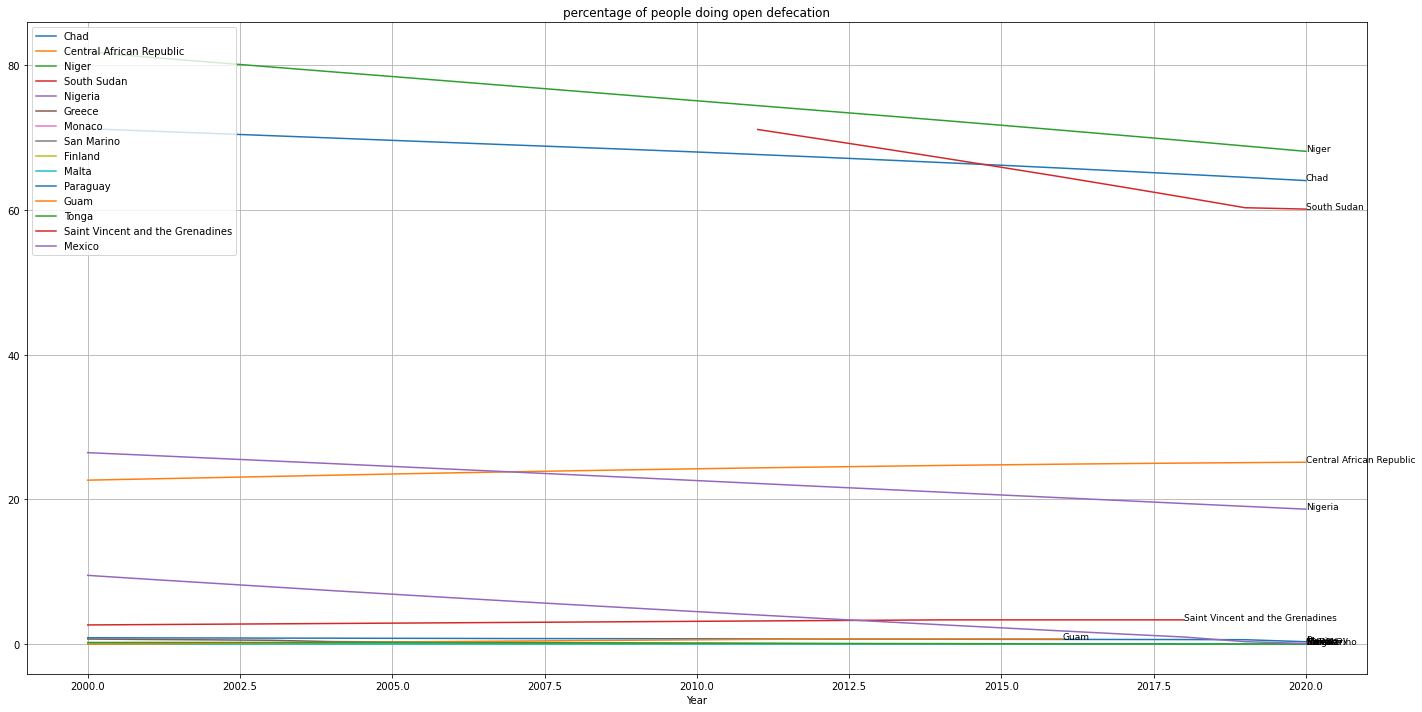

In [127]:
#people-practicing-open-defecation-of-population
selected_data = open_defecation_pandas[open_defecation_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'san_od'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['san_od'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['san_od'], country, fontsize=9)
    
plt.title('percentage of people doing open defecation')
plt.xlabel('Year')
#plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


No data available for South Sudan. Skipping...


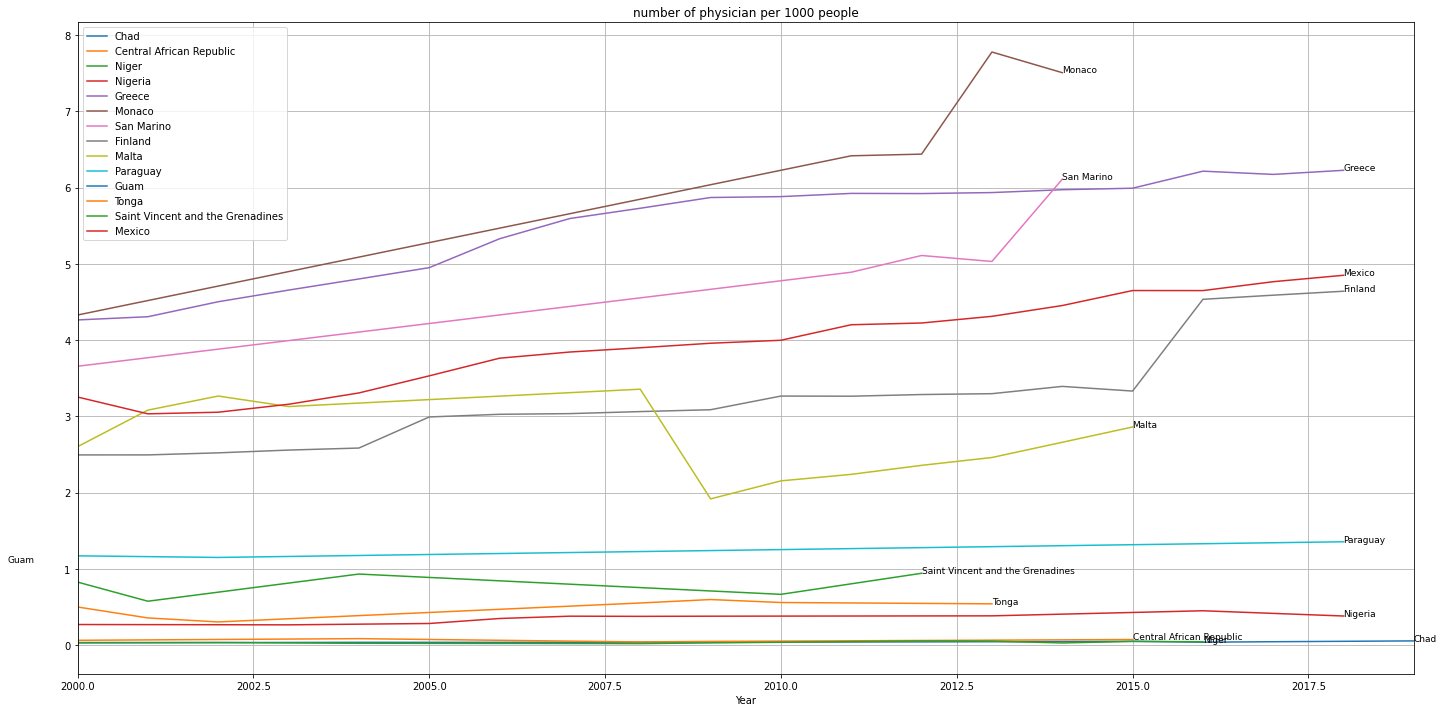

In [128]:
#physicians-per-1000-people
selected_data = physicians_number_pandas[physicians_number_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'Physicians (per 1,000 people)'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['Physicians (per 1,000 people)'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Physicians (per 1,000 people)'], country, fontsize=9)
    
plt.title('number of physician per 1000 people')
plt.xlabel('Year')
plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for Guam. Skipping...


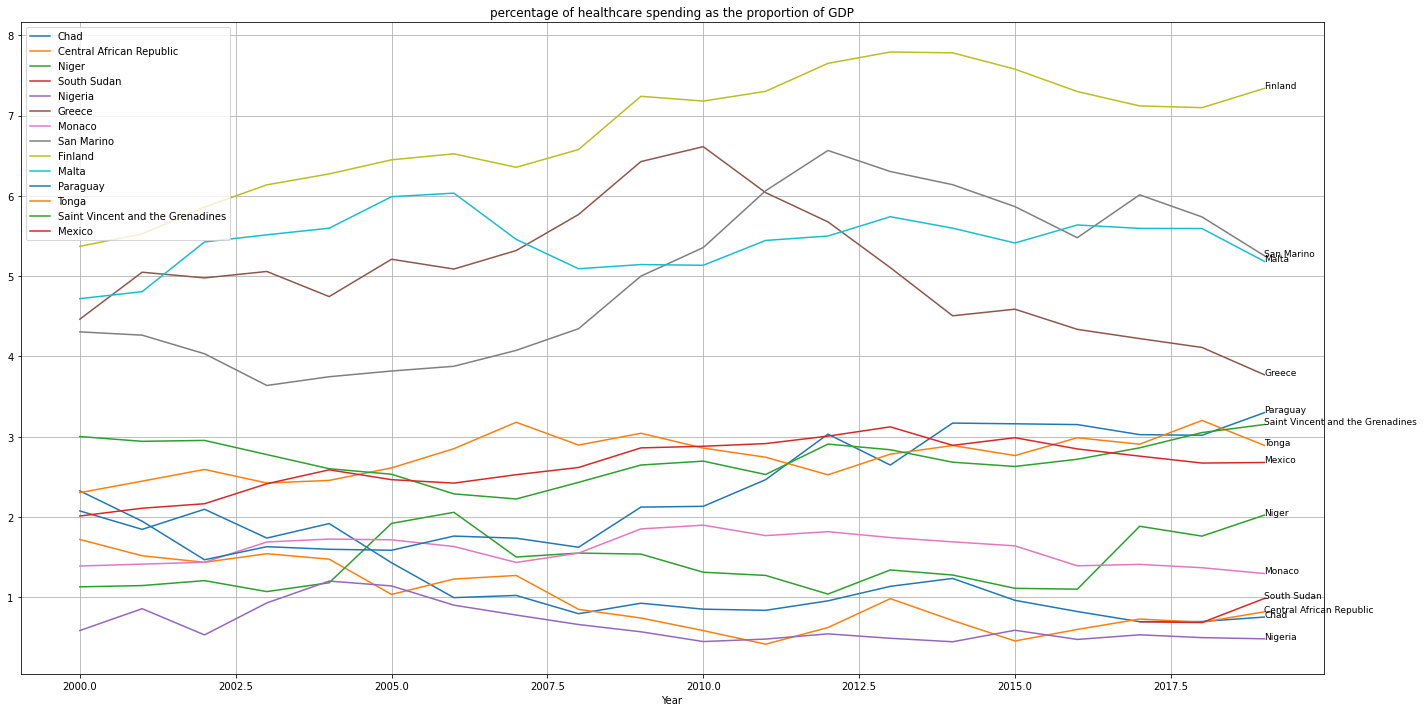

In [129]:
#public-healthcare-spending-share-gdp
selected_data = healthcare_spending_pandas[healthcare_spending_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'Domestic general government health expenditure (% of GDP)'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['Domestic general government health expenditure (% of GDP)'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Domestic general government health expenditure (% of GDP)'], country, fontsize=9)
    
plt.title('percentage of healthcare spending as the proportion of GDP')
plt.xlabel('Year')
#plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

No data available for Guam. Skipping...


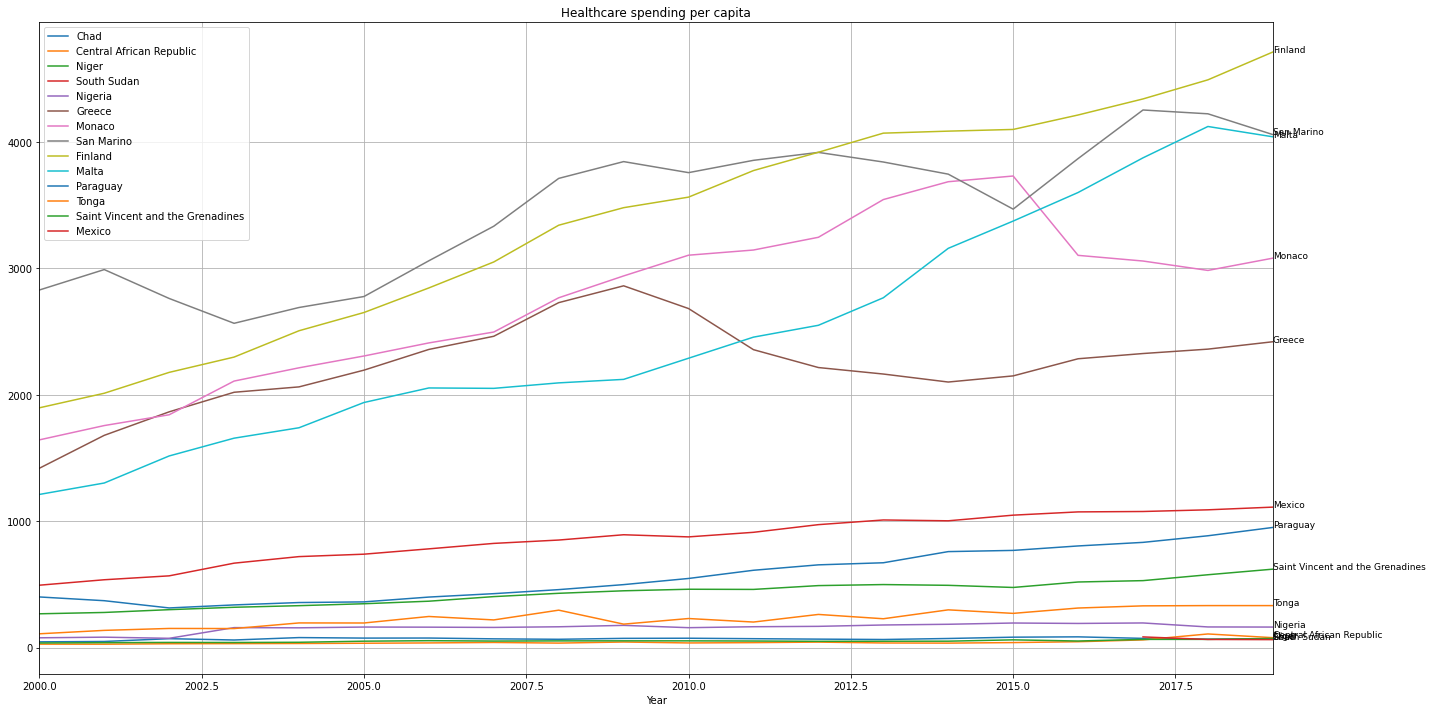

In [130]:
#healthcare_expenditure_vs_GDP
selected_data = healthcare_expenditure_vs_GDP_pandas[healthcare_expenditure_vs_GDP_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'Current health expenditure per capita, PPP (current international $)'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['Current health expenditure per capita, PPP (current international $)'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['Current health expenditure per capita, PPP (current international $)'], country, fontsize=9)
    
plt.title('Healthcare spending per capita')
plt.xlabel('Year')
plt.xlim(2000, 2019)
#plt.ylabel('death number')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

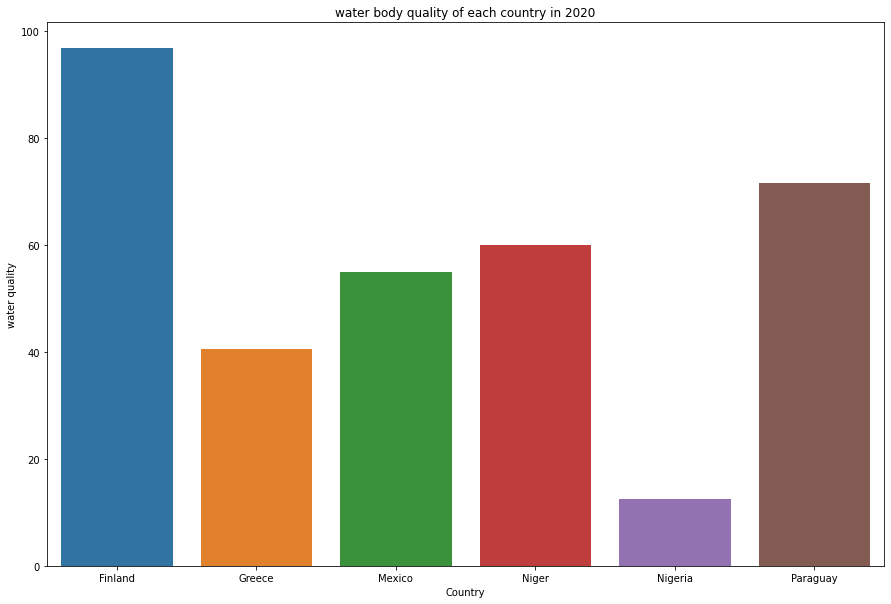

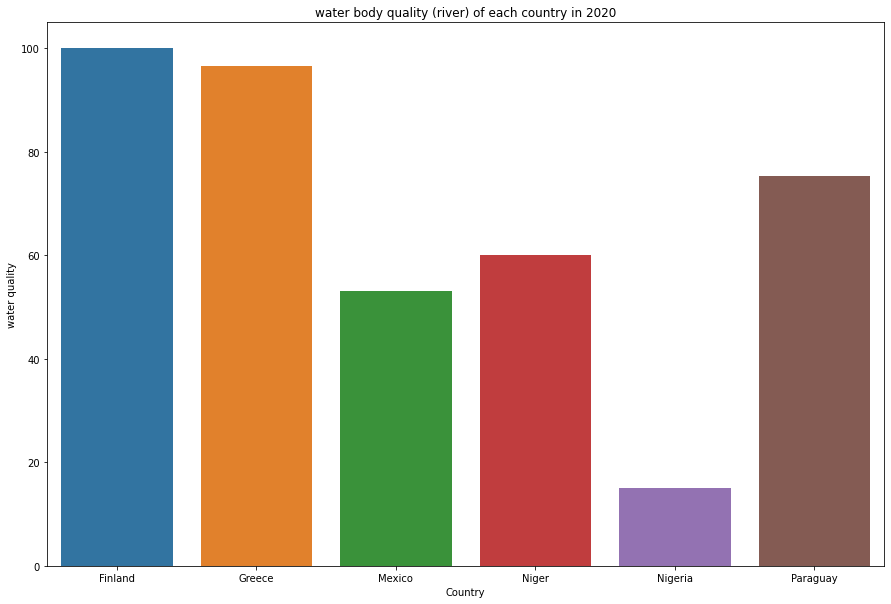

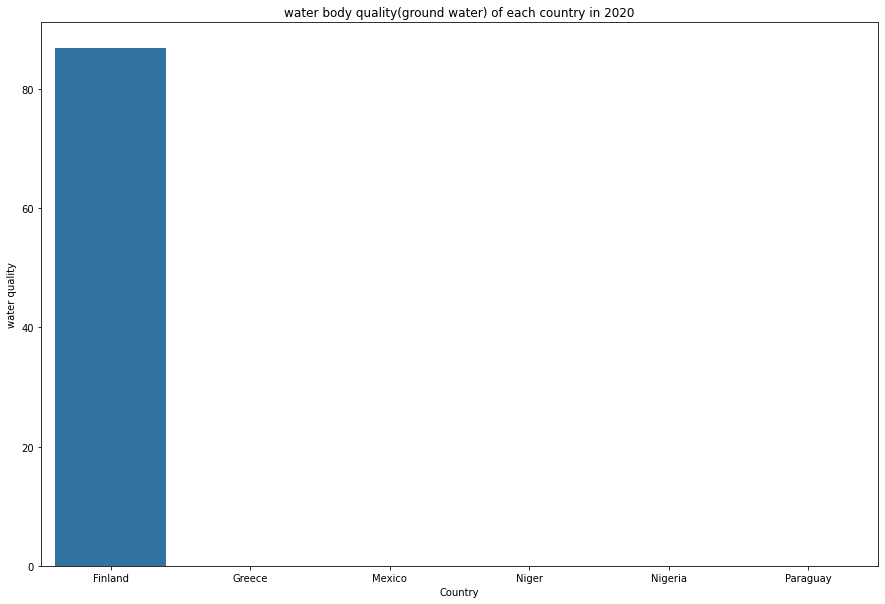

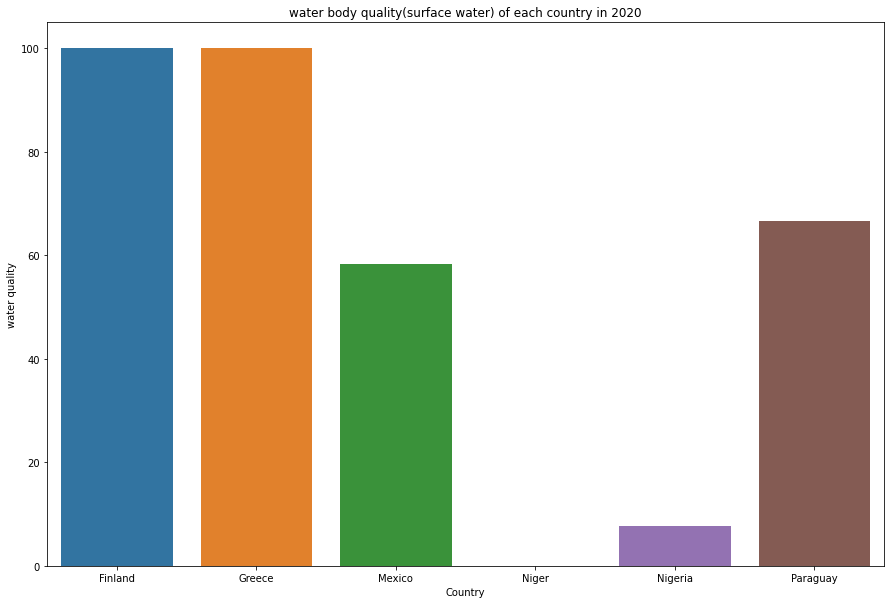

In [131]:
#water_bodies_quality
import seaborn as sns

selected_data = water_bodies_quality_pandas[(water_bodies_quality_pandas['Entity'].isin(selected_countries)) & (water_bodies_quality_pandas['Year'] == 2020)]

plt.figure(figsize=(15, 10))

sns.barplot(data=selected_data, x='Entity', y='6.3.2 - Proportion of bodies of water with good ambient water quality (%) - EN_H2O_WBAMBQ')

plt.title('water body quality of each country in 2020')
plt.xlabel('Country') 
plt.ylabel('water quality')
plt.show()


plt.figure(figsize=(15, 10))

sns.barplot(data=selected_data, x='Entity', y='6.3.2 - Proportion of river water bodies with good ambient water quality (%) - EN_H2O_RVAMBQ')

plt.title('water body quality (river) of each country in 2020')
plt.xlabel('Country') 
plt.ylabel('water quality')
plt.show()

selected_data = water_bodies_quality_pandas[(water_bodies_quality_pandas['Entity'].isin(selected_countries)) & (water_bodies_quality_pandas['Year'] == 2020)]

plt.figure(figsize=(15, 10))

sns.barplot(data=selected_data, x='Entity', y='6.3.2 - Proportion of groundwater bodies with good ambient water quality (%) - EN_H2O_GRAMBQ')

plt.title('water body quality(ground water) of each country in 2020')
plt.xlabel('Country') 
plt.ylabel('water quality')
plt.show()

selected_data = water_bodies_quality_pandas[(water_bodies_quality_pandas['Entity'].isin(selected_countries)) & (water_bodies_quality_pandas['Year'] == 2020)]

plt.figure(figsize=(15, 10))

sns.barplot(data=selected_data, x='Entity', y='6.3.2 - Proportion of open water bodies with good ambient water quality (%) - EN_H2O_OPAMBQ')

plt.title('water body quality(surface water) of each country in 2020')
plt.xlabel('Country') 
plt.ylabel('water quality')
plt.show()



No data available for San Marino. Skipping...
No data available for Guam. Skipping...
No data available for Saint Vincent and the Grenadines. Skipping...


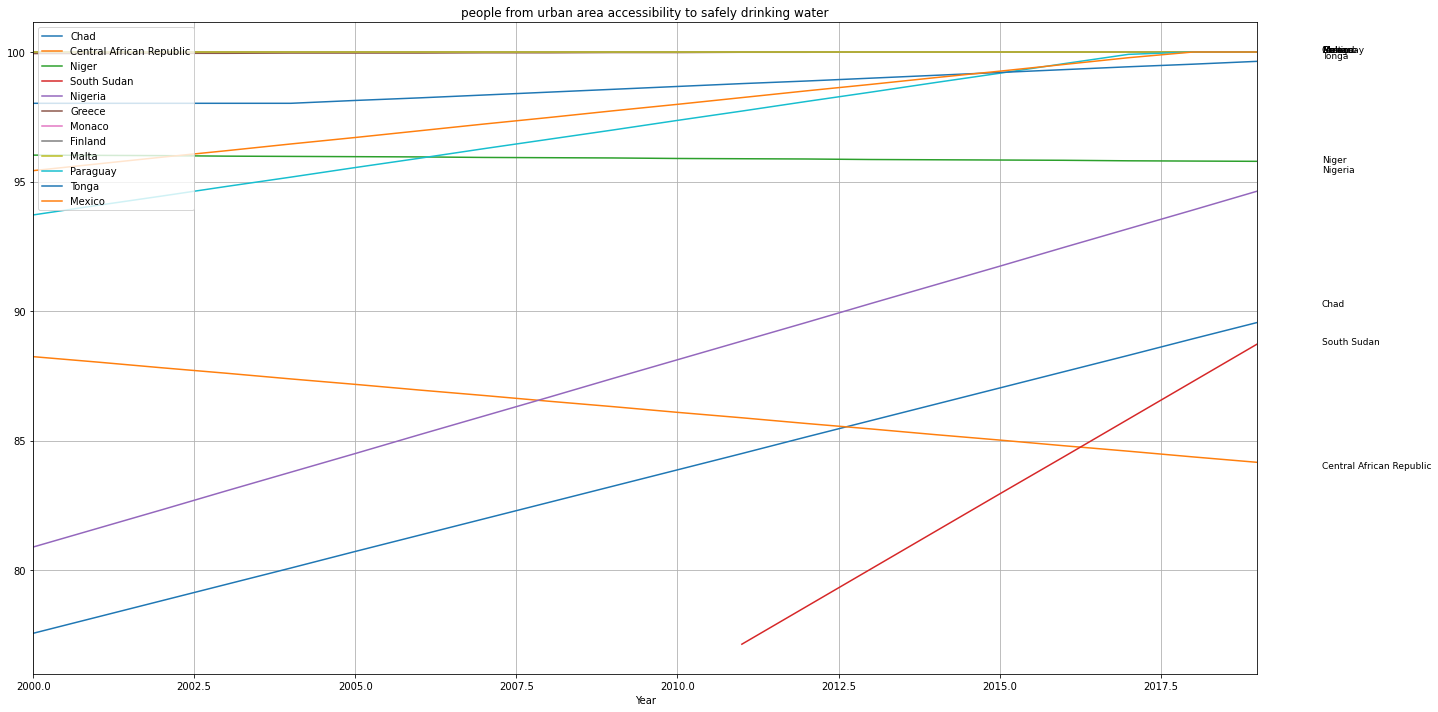

No data available for Monaco. Skipping...
No data available for San Marino. Skipping...
No data available for Guam. Skipping...
No data available for Saint Vincent and the Grenadines. Skipping...


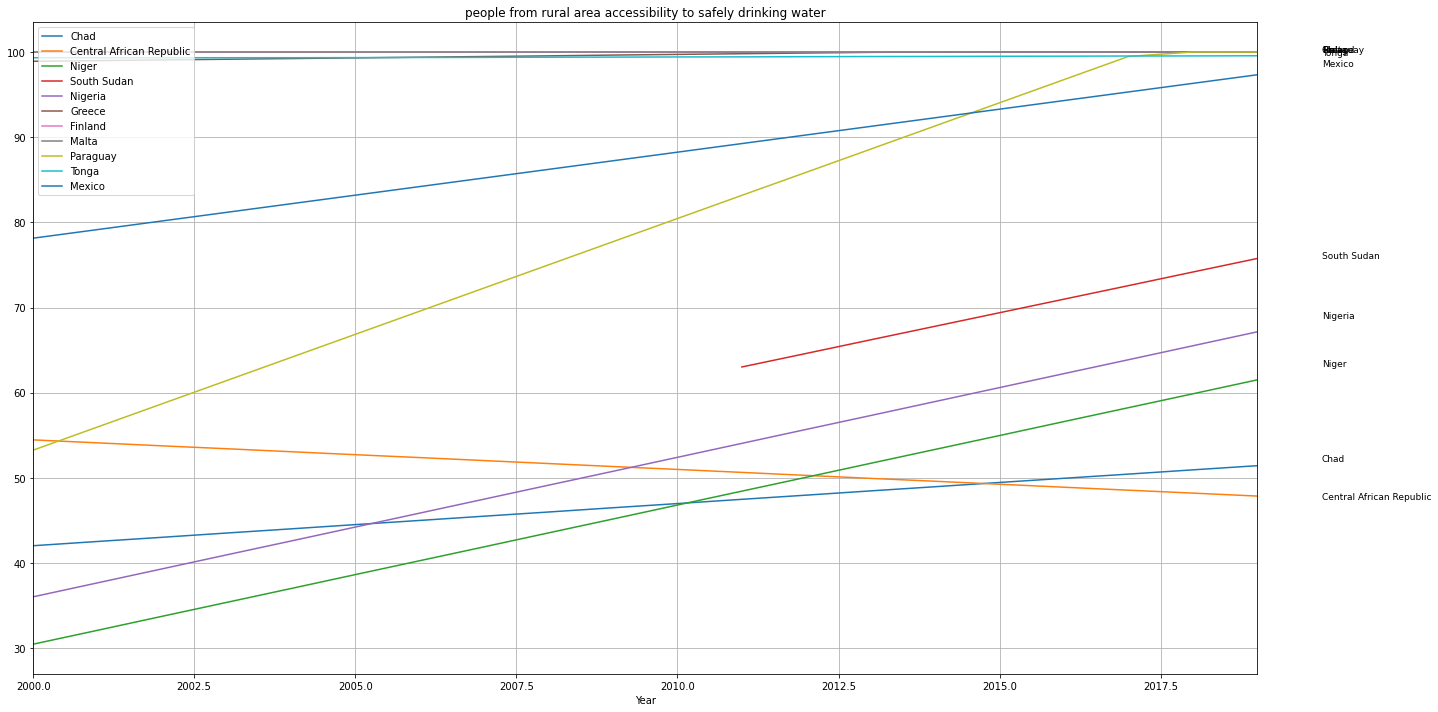

In [132]:
#urban-improved-water-access-vs-rural-water-access.csv
selected_data = urban_rural_imp_water_access_pandas[urban_rural_imp_water_access_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'wat_imp_urban'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['wat_imp_urban'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['wat_imp_urban'], country, fontsize=9)
    
plt.title('people from urban area accessibility to safely drinking water')
plt.xlabel('Year')
plt.xlim(2000, 2019)
#plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


selected_data = urban_rural_imp_water_access_pandas[urban_rural_imp_water_access_pandas['Entity'].isin(selected_countries)]
plt.figure(figsize=(20, 10))
for country in selected_countries:
    country_data = selected_data[selected_data['Entity'] == country]
    #filter the countries with NaN value
    country_data = country_data.dropna(subset=['Year', 'wat_imp_rural'])
    #sort the year to avoid error visualization
    country_data = country_data.sort_values(by='Year')
    # check the current country existence
    if country_data.empty:  
        print(f"No data available for {country}. Skipping...")
        continue
    plt.plot(country_data['Year'], country_data['wat_imp_rural'], label=country)
    last_point = country_data.iloc[-1]
    plt.text(last_point['Year'], last_point['wat_imp_rural'], country, fontsize=9)
    
plt.title('people from rural area accessibility to safely drinking water')
plt.xlabel('Year')
plt.xlim(2000, 2019)
#plt.ylabel('percentage')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Verify data quality

In [133]:
#checking the missing value condition
from pyspark.sql import functions
def count_nulls(df):
    return df.select([functions.sum(functions.when(functions.isnull("`" + c + "`"), 1).otherwise(0)).alias(c) for c in df.columns])

count_nulls(access_drinking).show()
count_nulls(death_rates_unsafe_water).show()
count_nulls(death_share_unsafe_water).show()
count_nulls(death_from_diarrheal_disease).show()
count_nulls(gov_spending).show()
count_nulls(improved_water_sources_vs_gdp).show()
count_nulls(number_without_improved_water).show()
count_nulls(number_without_safe_drinking_water).show()
count_nulls(open_defecation).show()
count_nulls(physicians_number).show()
count_nulls(healthcare_spending).show()
count_nulls(health_expenditure_share_GDP).show()
count_nulls(healthcare_expenditure_vs_GDP).show()
count_nulls(water_bodies_quality).show()
count_nulls(urban_rural_imp_water_access).show()


+------+----+----+------+----------------+-------+---------+-------+
|Entity|Code|Year|wat_sm|wat_bas_minus_sm|wat_lim|wat_unimp|wat_sur|
+------+----+----+------+----------------+-------+---------+-------+
|     0| 377|   0|  1907|            1907|      0|        0|     92|
+------+----+----+------+----------------+-------+---------+-------+

+------+----+----+-------------------------------------------------------------------------------------------------------------------------+
|Entity|Code|Year|Deaths that are from all causes attributed to unsafe water source per 100,000 people, in both sexes aged age-standardized|
+------+----+----+-------------------------------------------------------------------------------------------------------------------------+
|     0| 690|   0|                                                                                                                        0|
+------+----+----+------------------------------------------------------------------------

In [134]:
healthcare_expenditure_vs_GDP.show(50)

+-----------+--------+------+--------------------------------------------------------------------+---------------------------------------------+---------------------------------+---------+
|     Entity|    Code|  Year|Current health expenditure per capita, PPP (current international $)|GDP per capita, PPP (current international $)|Population (historical estimates)|Continent|
+-----------+--------+------+--------------------------------------------------------------------+---------------------------------------------+---------------------------------+---------+
|   Abkhazia|OWID_ABK|  2015|                                                                null|                                         null|                             null|     Asia|
|Afghanistan|     AFG|  2002|                                                           81.271034|                                     943.1163|                         21000258|     null|
|Afghanistan|     AFG|  2003|                          

# Data preparation

### Data integration

In [135]:

merged_data = death_share_unsafe_water.join(access_drinking, on=['Entity', 'Year', 'Code'], how='inner')
merged_data = merged_data.join(death_from_diarrheal_disease, on=['Entity', 'Year', 'Code'], how='inner')
merged_data = merged_data.join(improved_water_sources_vs_gdp, on=['Entity', 'Year', 'Code'], how='inner')
merged_data = merged_data.join(number_without_improved_water, on=['Entity', 'Year', 'Code'], how='inner')
merged_data = merged_data.join(open_defecation, on=['Entity', 'Year', 'Code'], how='inner')
merged_data = merged_data.join(healthcare_spending, on=['Entity', 'Year', 'Code'], how='inner')
urban_rural_imp_water_access = urban_rural_imp_water_access.drop("Continent")
urban_rural_imp_water_access = urban_rural_imp_water_access.drop("Population (historical estimates)")
merged_data = merged_data.join(urban_rural_imp_water_access, on=['Entity', 'Year', 'Code'], how='inner')

In [136]:
merged_data = merged_data.join(number_without_safe_drinking_water, on=['Entity', 'Year', 'Code'], how='left')
merged_data = merged_data.join(physicians_number, on=['Entity', 'Year', 'Code'], how='left')
merged_data = merged_data.join(water_bodies_quality, on=['Entity', 'Year', 'Code'], how='left')

In [137]:
merged_data.show()

+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+------+----------------+-------+---------+-------+-------------------------------------------------------------------------------+-------+---------------------------------------------------+---------------------------------+---------+----------------------+------+---------------------------------------------------------+-------------+-------------+---------------------+-----------------------------+-----------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------+
|     Entity|Year|Code|Share of total deaths that are from all causes attributed to unsa

In [138]:
merged_data.count()

3470

In [139]:
merged_data.toPandas().to_csv('merged_data.csv', index=False)

### Data cleaning

#### Missing value

In [140]:
#merged_data.na.drop().show()

In [141]:
'''
new_col_name = "Proportion of bodies of water with good ambient water quality"
merged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of bodies of water with good ambient water quality (%) - EN_H2O_WBAMBQ", new_col_name)
new_col_name = "Proportion of river water bodies with good ambient water quality"
merged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of river water bodies with good ambient water quality (%) - EN_H2O_RVAMBQ", new_col_name)
new_col_name = "Proportion of groundwater bodies with good ambient water quality"
merged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of groundwater bodies with good ambient water quality (%) - EN_H2O_GRAMBQ", new_col_name)
new_col_name = "Proportion of open water bodies with good ambient water quality"
merged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of open water bodies with good ambient water quality (%) - EN_H2O_OPAMBQ", new_col_name)
'''

'\nnew_col_name = "Proportion of bodies of water with good ambient water quality"\nmerged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of bodies of water with good ambient water quality (%) - EN_H2O_WBAMBQ", new_col_name)\nnew_col_name = "Proportion of river water bodies with good ambient water quality"\nmerged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of river water bodies with good ambient water quality (%) - EN_H2O_RVAMBQ", new_col_name)\nnew_col_name = "Proportion of groundwater bodies with good ambient water quality"\nmerged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of groundwater bodies with good ambient water quality (%) - EN_H2O_GRAMBQ", new_col_name)\nnew_col_name = "Proportion of open water bodies with good ambient water quality"\nmerged_data = merged_data.withColumnRenamed("6.3.2 - Proportion of open water bodies with good ambient water quality (%) - EN_H2O_OPAMBQ", new_col_name)\n'

In [143]:
#merged_data.na.drop().show()

In [144]:
merged_data.toPandas().isnull().mean()

Entity                                                                                                                   0.000000
Year                                                                                                                     0.000000
Code                                                                                                                     0.000000
Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized    0.000000
wat_sm                                                                                                                   0.378098
wat_bas_minus_sm                                                                                                         0.378098
wat_lim                                                                                                                  0.000000
wat_unimp                                                                                 

In [145]:
merged_data = merged_data.drop('6.3.2 - Proportion of bodies of water with good ambient water quality (%) - EN_H2O_WBAMBQ')
merged_data = merged_data.drop('6.3.2 - Proportion of river water bodies with good ambient water quality (%) - EN_H2O_RVAMBQ')
merged_data = merged_data.drop('6.3.2 - Proportion of groundwater bodies with good ambient water quality (%) - EN_H2O_GRAMBQ')
merged_data = merged_data.drop('6.3.2 - Proportion of open water bodies with good ambient water quality (%) - EN_H2O_OPAMBQ')
merged_data = merged_data.drop('Continent')

In [146]:
merged_data = merged_data.dropna(subset=['wat_sm', 'wat_bas_minus_sm'], how='all')

In [147]:
merged_data.toPandas().isnull().mean()

Entity                                                                                                                   0.000000
Year                                                                                                                     0.000000
Code                                                                                                                     0.000000
Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized    0.000000
wat_sm                                                                                                                   0.000000
wat_bas_minus_sm                                                                                                         0.000000
wat_lim                                                                                                                  0.000000
wat_unimp                                                                                 

In [148]:
from pyspark.sql import functions 
#impute wat_sur

if "mean_wat_sur" in merged_data.columns:
    merged_data = merged_data.drop("mean_wat_sur")
    
wat_sur_means = merged_data.groupBy('Entity').agg(functions.mean('wat_sur').alias('mean_wat_sur'))
merged_data = merged_data.join(wat_sur_means, on='Entity', how='left')
merged_data = merged_data.withColumn('wat_sur', 
                                     functions.when(functions.isnull('wat_sur'), functions.col('mean_wat_sur'))
                                      .otherwise(functions.col('wat_sur')))
merged_data = merged_data.drop('mean_wat_sur')


In [149]:
##impute physician
if "mean_physician" in merged_data.columns:
    merged_data = merged_data.drop("mean_physician")
physician_means = merged_data.groupBy('Entity').agg(functions.mean('Physicians (per 1,000 people)').alias('mean_physician'))
merged_data = merged_data.join(physician_means, on='Entity', how='left')

merged_data = merged_data.withColumn('Physicians (per 1,000 people)', 
                                     functions.when(functions.isnull('Physicians (per 1,000 people)'), functions.col('mean_physician'))
                                      .otherwise(functions.col('Physicians (per 1,000 people)')))
merged_data = merged_data.drop('mean_physician')


In [150]:
#impute GDP
if "mean_GDP_per_capita" in merged_data.columns:
    merged_data = merged_data.drop("mean_GDP_per_capita")
GDP_per_capita_means = merged_data.groupBy('Entity').agg(functions.mean('GDP per capita, PPP (constant 2017 international $)').alias('mean_GDP_per_capita'))
merged_data = merged_data.join(GDP_per_capita_means, on='Entity', how='left')

merged_data = merged_data.withColumn('GDP per capita, PPP (constant 2017 international $)', 
                                     functions.when(functions.isnull('GDP per capita, PPP (constant 2017 international $)'), functions.col('mean_GDP_per_capita'))
                                      .otherwise(functions.col('GDP per capita, PPP (constant 2017 international $)')))
merged_data = merged_data.drop('mean_GDP_per_capita')


In [151]:
merged_data.toPandas().isnull().mean()

Entity                                                                                                                   0.000000
Year                                                                                                                     0.000000
Code                                                                                                                     0.000000
Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized    0.000000
wat_sm                                                                                                                   0.000000
wat_bas_minus_sm                                                                                                         0.000000
wat_lim                                                                                                                  0.000000
wat_unimp                                                                                 

In [152]:
merged_data.show(50)

+-----------+----+----+---------------------------------------------------------------------------------------------------------------------+------+----------------+-------+---------+-------+-------------------------------------------------------------------------------+-------+---------------------------------------------------+---------------------------------+----------------------+------+---------------------------------------------------------+-------------+-------------+---------------------+-----------------------------+
|     Entity|Year|Code|Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized|wat_sm|wat_bas_minus_sm|wat_lim|wat_unimp|wat_sur|death_count - Cause: Diarrhoeal diseases - Sex: Both sexes - Age_group: ALLAges|wat_imp|GDP per capita, PPP (constant 2017 international $)|Population (historical estimates)|wat_imp_number_without|san_od|Domestic general government health expenditure (% of GDP)|wat_imp_urban

In [153]:
urban_rural_imp_water_access.filter(urban_rural_imp_water_access['wat_imp_urban'].isNull() | urban_rural_imp_water_access['wat_imp_rural'].isNull()).show()

+-----------+--------+------+-------------+-------------+
|     Entity|    Code|  Year|wat_imp_urban|wat_imp_rural|
+-----------+--------+------+-------------+-------------+
|   Abkhazia|OWID_ABK|  2015|         null|         null|
|Afghanistan|     AFG|-10000|         null|         null|
|Afghanistan|     AFG| -9000|         null|         null|
|Afghanistan|     AFG| -8000|         null|         null|
|Afghanistan|     AFG| -7000|         null|         null|
|Afghanistan|     AFG| -6000|         null|         null|
|Afghanistan|     AFG| -5000|         null|         null|
|Afghanistan|     AFG| -4000|         null|         null|
|Afghanistan|     AFG| -3000|         null|         null|
|Afghanistan|     AFG| -2000|         null|         null|
|Afghanistan|     AFG| -1000|         null|         null|
|Afghanistan|     AFG|     0|         null|         null|
|Afghanistan|     AFG|   100|         null|         null|
|Afghanistan|     AFG|   200|         null|         null|
|Afghanistan| 

In [154]:
merged_data = merged_data.dropna(subset=['wat_imp_urban', 'wat_imp_rural'])

In [155]:
merged_data.toPandas().isnull().mean()

Entity                                                                                                                   0.0
Year                                                                                                                     0.0
Code                                                                                                                     0.0
Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized    0.0
wat_sm                                                                                                                   0.0
wat_bas_minus_sm                                                                                                         0.0
wat_lim                                                                                                                  0.0
wat_unimp                                                                                                                0.0


In [156]:
merged_data.count()

1951

In [157]:
merged_data.toPandas().to_csv('merged_data.csv', index=False)

In [158]:
merged_data.toPandas().to_csv('merged_data_cleaned.csv', index=False)

#### Outliers and extremes

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/04 10:15:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
merged_data = spark.read.csv('merged_data_cleaned.csv',header=True, inferSchema=True)

In [3]:
merged_data.describe(['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized']).show()

+-------+---------------------------------------------------------------------------------------------------------------------+
|summary|Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized|
+-------+---------------------------------------------------------------------------------------------------------------------+
|  count|                                                                                                                 1951|
|   mean|                                                                                                   1.5779688889171897|
| stddev|                                                                                                    2.570510835989067|
|    min|                                                                                                         3.6503555E-4|
|    max|                                                                                               

In [4]:
merged_data.count()

1951

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, stddev, col

# Calculate the mean and standard deviation 
death_share_stats = merged_data.select(
    mean(col('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized')).alias('mean'),
    stddev(col('Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized')).alias('std')
).collect()

mean_death_share = death_share_stats[0]['mean']
std_death_share = death_share_stats[0]['std']

# Filter out the values that are outside of the mean +/- 3*std
filtered_data = merged_data.filter(
    (merged_data['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'] >= mean_death_share - 3 * std_death_share) & 
    (merged_data['Share of total deaths that are from all causes attributed to unsafe water source, in both sexes aged age-standardized'] <= mean_death_share + 3 * std_death_share)
)
filtered_data.count()




1920

In [6]:
# Calculate the mean and standard deviation 
wat_sm_stats = filtered_data.select(
    mean(col('wat_sm')).alias('mean'),
    stddev(col('wat_sm')).alias('std')
).collect()

wat_sm_share = wat_sm_stats[0]['mean']
std_wat_sm = wat_sm_stats[0]['std']

# Filter out the values that are outside of the mean +/- 3*std
filtered_data = filtered_data.filter(
    (filtered_data['wat_sm'] >= wat_sm_share - 3 * std_wat_sm) & 
    (filtered_data['wat_sm'] <= wat_sm_share + 3 * std_wat_sm)
)
filtered_data.count()

1920

In [7]:
# Calculate the mean and standard deviation 
wat_bas_minus_sm_stats = filtered_data.select(
    mean(col('wat_bas_minus_sm')).alias('mean'),
    stddev(col('wat_bas_minus_sm')).alias('std')
).collect()

wat_bas_minus_sm_share = wat_bas_minus_sm_stats[0]['mean']
std_wat_bas_minus_sm = wat_bas_minus_sm_stats[0]['std']

# Filter out the values that are outside of the mean +/- 3*std
filtered_data = filtered_data.filter(
    (filtered_data['wat_bas_minus_sm'] >= wat_bas_minus_sm_share - 3 * std_wat_bas_minus_sm) & 
    (filtered_data['wat_bas_minus_sm'] <= wat_bas_minus_sm_share + 3 * std_wat_bas_minus_sm)
)
filtered_data.count()

1920

In [8]:
# Calculate the mean and standard deviation 
wat_lim_stats = filtered_data.select(
    mean(col('wat_lim')).alias('mean'),
    stddev(col('wat_lim')).alias('std')
).collect()

wat_lim_share = wat_lim_stats[0]['mean']
std_wat_lim= wat_lim_stats[0]['std']

# Filter out the values that are outside of the mean +/- 3*std
filtered_data = filtered_data.filter(
    (filtered_data['wat_lim'] >= wat_lim_share - 3 * std_wat_lim) & 
    (filtered_data['wat_lim'] <= wat_lim_share + 3 * std_wat_lim)
)
filtered_data.count()

1868

In [166]:
variables_to_filter = [
    'wat_unimp', 'wat_sur', 
    'death_count - Cause: Diarrhoeal diseases - Sex: Both sexes - Age_group: ALLAges', 
    'wat_imp', 'GDP per capita, PPP (constant 2017 international $)', 
    'Population (historical estimates)', 'wat_imp_number_without', 
    'san_od', 'Domestic general government health expenditure (% of GDP)', 
    'wat_imp_urban', 'wat_imp_rural', 'wat_sm_number_without', 
    'Physicians (per 1,000 people)'
]

for variable in variables_to_filter:
    stats = filtered_data.select(
        mean(col(variable)).alias('mean'),
        stddev(col(variable)).alias('std')
    ).collect()
    
    mean_value = stats[0]['mean']
    std_value = stats[0]['std']

    # Filter out the values that are outside of the mean +/- 3*std
    filtered_data = filtered_data.filter(
        (filtered_data[variable] >= mean_value - 3 * std_value) & 
        (filtered_data[variable] <= mean_value + 3 * std_value)
    )

filtered_data.count()


1434

In [9]:
filtered_data.toPandas().to_csv('merged_data_cleaned.csv', index=False)